In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.ensemble

In [2]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.20002590656416647
[[0.05907759 0.05819065 0.11965911 0.22258214 0.54049051]
 [0.06464013 0.0598941  0.11865072 0.22682879 0.52998627]
 [0.06222883 0.05991085 0.11750371 0.22617137 0.53418524]
 [0.0626671  0.06122109 0.11690784 0.227085   0.53211897]
 [0.0617525  0.06054635 0.118782   0.22538316 0.53353598]]


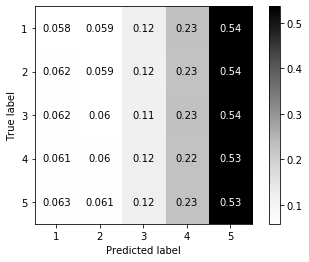

In [3]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

In [4]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, learning_rate='N/A', n_estimators='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,baseline,full,count,None,N/A,N/A,0.358088,0.200403


In [11]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('random_downsampling', 'count', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.39705397202428083

In [9]:
classifier.score(test_as_vec, test_targets)

0.533355483919617

In [14]:
N_ESTIMATORS = 10

for sampling in ['random_downsampling', 'full']:# , 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for learning_rate in [0.1, 0.5, 1]:
            print(f'        learning_rate = {learning_rate}')

            train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                sampling, representation, None)

            classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=N_ESTIMATORS, learning_rate=learning_rate)
            classifier.fit(train_as_vec, train_targets)

            results_df = results_df.append([
                    common.perf_row(
                        classifier, test_as_vec, test_targets,
                        'N/A', sampling, representation, 
                        None, n_estimators=N_ESTIMATORS, learning_rate=learning_rate)])

sampling = random_downsampling
    representation = count
        learning_rate = 0.1
        learning_rate = 0.5
        learning_rate = 1
    representation = tf_idf
        learning_rate = 0.1
        learning_rate = 0.5
        learning_rate = 1
sampling = full
    representation = count
        learning_rate = 0.1
        learning_rate = 0.5
        learning_rate = 1
    representation = tf_idf
        learning_rate = 0.1


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


        learning_rate = 0.5
        learning_rate = 1


In [17]:
results_df.sort_values('score', ascending=False)

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,N/A,random_downsampling,tf_idf,None,1,10,0.429667,0.339933
0,N/A,random_downsampling,count,None,1,10,0.442531,0.338003
0,N/A,random_downsampling,count,None,0.5,10,0.437502,0.336282
0,N/A,random_downsampling,tf_idf,None,0.5,10,0.435252,0.331635
0,N/A,random_downsampling,count,None,0.1,10,0.401772,0.314914
0,N/A,random_downsampling,tf_idf,None,0.1,10,0.409755,0.306285
0,N/A,full,count,None,1,10,0.545826,0.272546
0,N/A,full,tf_idf,None,1,10,0.544843,0.264352
0,N/A,full,tf_idf,None,0.5,10,0.539037,0.220025
0,N/A,full,count,None,0.5,10,0.537901,0.216604


In [18]:
results_df.sort_values('real_world_acc', ascending=False)

,classifier_type,sampling,representation,preprocessing,learning_rate,n_estimators,real_world_acc,score
0,N/A,full,count,None,1,10,0.545826,0.272546
0,N/A,full,tf_idf,None,1,10,0.544843,0.264352
0,N/A,full,tf_idf,None,0.5,10,0.539037,0.220025
0,N/A,full,count,None,0.5,10,0.537901,0.216604
0,N/A,full,count,None,0.1,10,0.533355,0.200000
0,N/A,full,tf_idf,None,0.1,10,0.533355,0.200000
0,N/A,random_downsampling,count,None,1,10,0.442531,0.338003
0,N/A,random_downsampling,count,None,0.5,10,0.437502,0.336282
0,N/A,random_downsampling,tf_idf,None,0.5,10,0.435252,0.331635
0,N/A,random_downsampling,tf_idf,None,1,10,0.429667,0.339933


# Winners (boo!)

In [19]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('random_downsampling', 'tf_idf', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=10, learning_rate=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.42966717565886214

In [21]:
common.get_score(classifier, test_as_vec, test_targets)

0.33993329124163346

SCORE: 0.33993329124163346
[[0.39399198 0.13894031 0.1714484  0.05132655 0.24429277]
 [0.21666994 0.17321043 0.28601687 0.10892332 0.21517945]
 [0.10419019 0.13521545 0.35603764 0.16229817 0.24225854]
 [0.06028483 0.07970705 0.29876101 0.19969415 0.36155295]
 [0.04715493 0.04139366 0.18038429 0.15433487 0.57673225]]


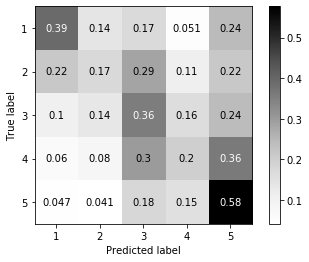

In [22]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)

In [23]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
classifier = sklearn.ensemble.AdaBoostClassifier(n_estimators=10, learning_rate=1)
classifier.fit(train_as_vec, train_targets)
classifier.score(test_as_vec, test_targets)

0.5458257927082155

SCORE: 0.27254614272317623
[[0.22250501 0.01966682 0.05498997 0.07847447 0.62436372]
 [0.09809767 0.02565209 0.06130614 0.147323   0.6676211 ]
 [0.03627538 0.00980684 0.04570579 0.19021298 0.71799901]
 [0.01371103 0.00391149 0.02197093 0.1461192  0.81428735]
 [0.00693208 0.0018247  0.00867725 0.05981735 0.92274862]]


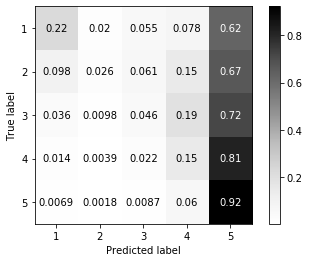

In [25]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)